**Acquiring the dataset about diabetes**

<h1><b>Importing the necessary libraries</b></h1>

In [ ]:
from zipfile import ZipFile 
import seaborn as sns 
import requests 
import pandas as pd 
from matplotlib import pyplot as plt 
import bs4, numpy as np 
from sklearn.preprocessing import KBinsDiscretizer
from sklearn import set_config
from scipy.io import arff
import io, warnings
sns.set_style('darkgrid')
set_config(display = 'diagram')
warnings.simplefilter('ignore')

In [ ]:
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00544/ObesityDataSet_raw_and_data_sinthetic%20(2).zip'

zip_file = ZipFile(io.BytesIO(requests.get(URL).content), 'r')
zip_file.extractall()
zip_file.close()

arff_file, info = arff.loadarff('/content/ObesityDataSet_raw_and_data_sinthetic.arff')
df = pd.DataFrame(arff_file)

<h1><b>MOTIVATION</b></h1>
<strong><p>To understand the causes of obesity and to classify and distinguish between types of obesities<p></strong>
<h4> Attributes and their descriptions </h4> 
<ul>
  <li>FAVC: Frequent consumption of high caloric food</li> 
  <li>FCVC: Frequency of consumption of vegetables</li> 
  <li>NCP: Number of main meals</li> 
  <li>CAEC: Consumption of food between meals</li> 
  <li>CH2O: Consumption of water daily</li> 
  <li>CALC: Consumption of alcohol</li> 
  <li>SCC: Calories consumption monitoring</li> 
  <li>FAF: Physical activity frequency</li> 
  <li>TUE: Time using technological devices </li> 
  <li>MTRANS: Transportation used</li> 
</ul>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
info

Dataset: obeyesdad-weka.filters.supervised.instance.SMOTE-C0-K5-P300.0-S1-weka.filters.supervised.instance.SMOTE-C1-K5-P300.0-S1-weka.filters.supervised.instance.SMOTE-C1-K5-P100.0-S1-weka.filters.supervised.instance.SMOTE-C3-K5-P100.0-S1-weka.filters.supervised.instance.SMOTE-C3-K5-P150.0-S1-weka.filters.supervised.instance.SMOTE-C4-K5-P150.0-S1-weka.filters.supervised.instance.SMOTE-C4-K5-P100.0-S1-weka.filters.supervised.instance.SMOTE-C5-K5-P150.0-S1-weka.filters.supervised.instance.SMOTE-C5-K5-P200.0-S1-weka.filters.supervised.instance.SMOTE-C6-K5-P200.0-S1-weka.filters.supervised.instance.SMOTE-C6-K5-P200.0-S1-weka.filters.supervised.instance.SMOTE-C6-K5-P200.0-S1-weka.filters.supervised.instance.SMOTE-C7-K5-P200.0-S1-weka.filters.supervised.instance.SMOTE-C7-K5-P200.0-S1-weka.filters.supervised.instance.SMOTE-C7-K5-P200.0-S1
	Gender's type is nominal, range is ('Female', 'Male')
	Age's type is numeric
	Height's type is numeric
	Weight's type is numeric
	family_history_with_overw

In [ ]:
sns.pairplot(df, hue = 'NObeyesdad')

Output hidden; open in https://colab.research.google.com to view.

This can get a little tideous to interpret... 
Let's look at the interesting bits
<hr>


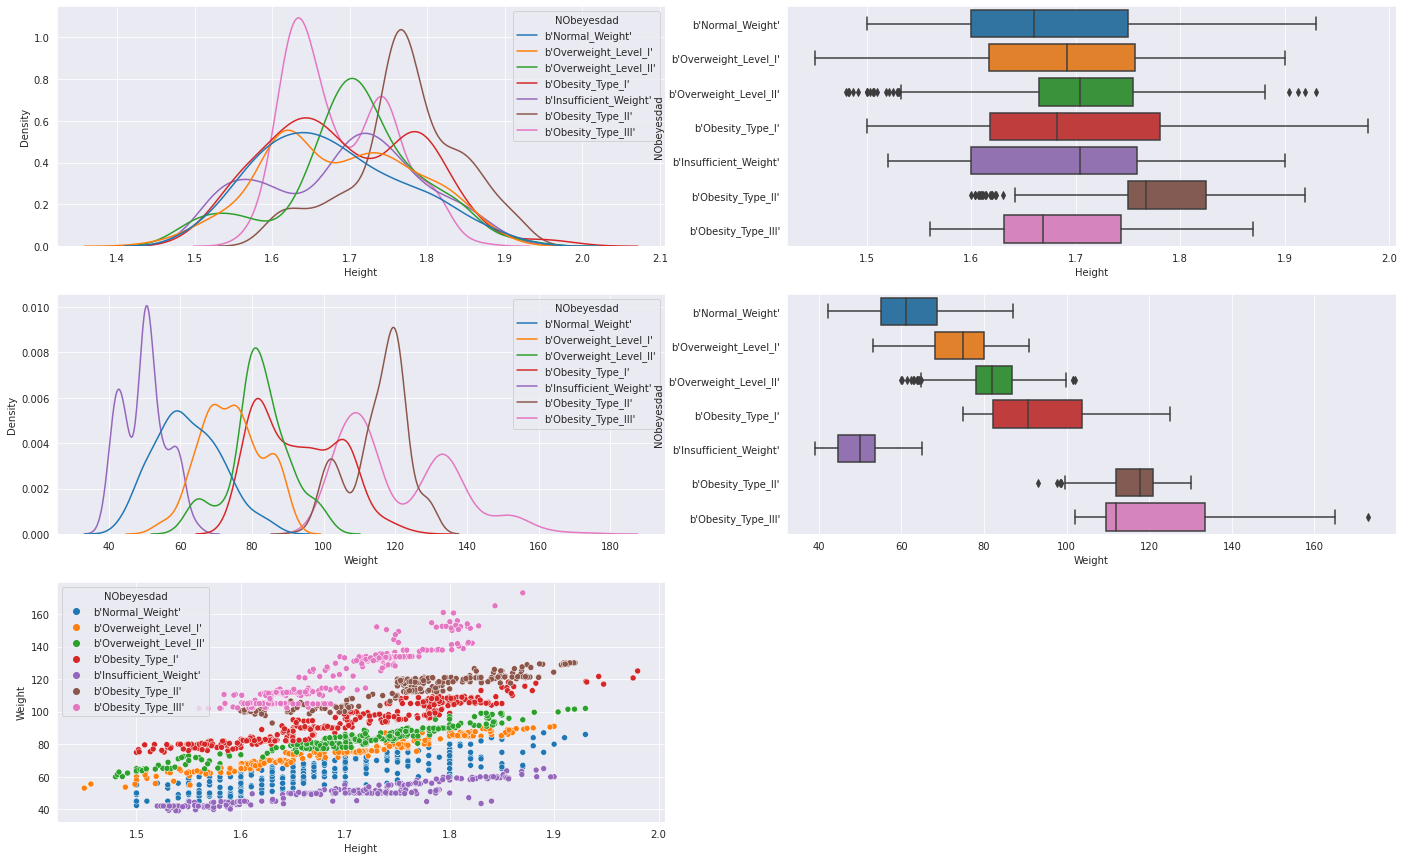

In [ ]:
fig = plt.figure(figsize = (24, 15))

ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5)

sns.kdeplot(x = 'Height', data = df, hue = 'NObeyesdad', ax = ax1)
sns.boxplot(x = 'Height', data = df, y = 'NObeyesdad', ax = ax2)
sns.kdeplot(x = 'Weight', data = df, hue = 'NObeyesdad', ax = ax3)
sns.boxplot(x = 'Weight', data = df, y = 'NObeyesdad', ax = ax4)
sns.scatterplot( x = 'Height', y = 'Weight', hue = 'NObeyesdad', ax = ax5, data = df)

ax2.legend().remove()
ax4.legend().remove()
plt.show()

<h3>INFERENCE:</h3> 
<ul>
  <li>Obvious but important to note, higher the weight more likely you are to be obese to a unhealthy degree</li>
  <li>Height weight duality are very clear classifiers of type of obesity</li>
  <li>Obesity is not entirely caused by short heights. As you can see the obesity type 2 patients are generally taller.</li>
</ul>


###Creating more categorical variables to analyse discretised clusters of numercal variables

*  Since our numerical variables don't show much correlation with each other we can turn them into categorical variables using clustering algorithms.
*   Here we'll make 3 groups of all of the numerical columns and each of the groups will have some average which we will use to define the entire group as a category. 
* We'll use the KBinsDiscretizer class from sklearn.preprocessing module to attain the provided goal. 



In [ ]:
kbd = KBinsDiscretizer(strategy='kmeans', n_bins=3, encode='ordinal')
unwanted = set(['Age', 'Height', 'Weight'])
columns = list(set(df.select_dtypes(np.number).columns) - unwanted) 
kbd.fit(df.loc[:, columns])

#Creating a list with the names of the new columns by adding a '_cls' at the end 
col_cls = []
for col_name in columns:
  col_name = col_name + '_cls'
  col_cls.append(col_name)

#Creating ordinally encoded clusters and storing them as object so we can deal with it as a category and storing them in the newly created columns
df[col_cls] = kbd.transform(df[columns])
df[col_cls] = df[col_cls].astype(object)

######We'll then store the averages of the groups/clusters identified in the individual columns and store them in respective variables.


In [ ]:
FAF_cls, CH2O_cls, FCVC_cls, NCP_cls, TUE_cls = kbd.bin_edges_

We'll now use the averages to replace the ordinal encoded labels so our results ar easier to interpret

In [ ]:
# Creating a hashmap that will update itself in every iteration with values of the centroids 

hashmap = {
    '0':None, '1':None, '2':None
}

# Storing the columns themselevs and their corresponding centroids instead of the encoded values
clusters = {
    'CH2O_cls':CH2O_cls,
    'TUE_cls': TUE_cls, 
    'FAF_cls': FAF_cls, 
    'FCVC_cls':FCVC_cls, 
    'NCP_cls':NCP_cls
}

#Iterating over the clusters dictionary to update the hashmap for every numerical column and replace the ordinaly encoded values
for col, mapper in clusters.items():
  
  for i in range(3):
    hashmap[str(i)] = mapper[i]

  df[col] = df[col].apply(lambda x: f'{hashmap[str(int(x))]:.2f}')


##<b>Univariate Analysis</b>


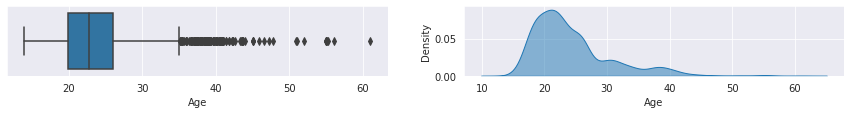

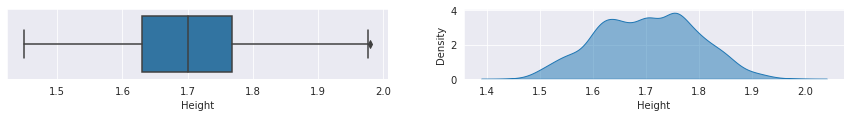

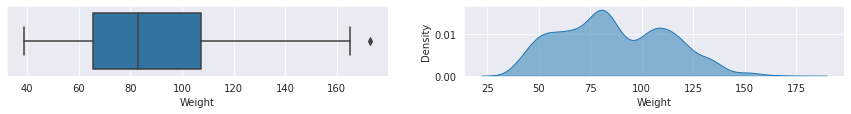

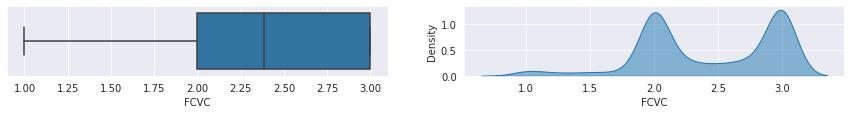

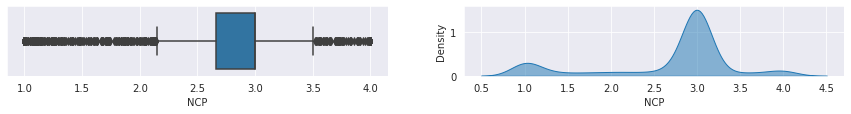

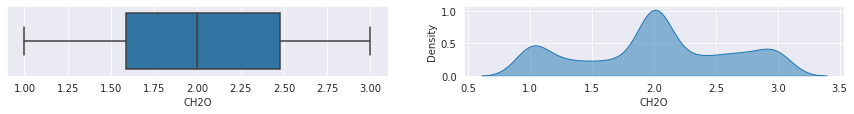

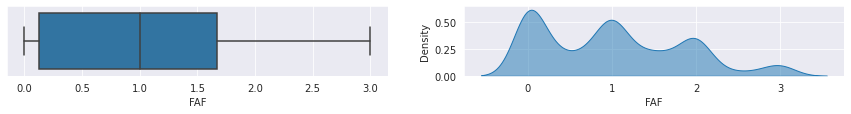

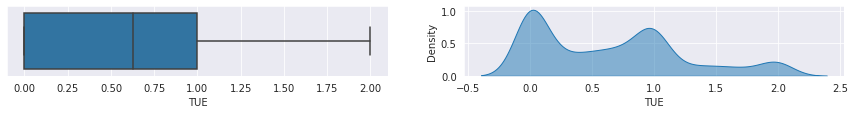

In [ ]:
numericals = list(df.select_dtypes(np.number).columns) 
categoricals = list(df.select_dtypes(object).columns) 

# Plotting numerical variables 
ind = 0
for number in numericals:
  fig = plt.figure(figsize=(15, 12))
  ind += 1
  ax1 = fig.add_subplot(8, 2, ind)
  ind += 1
  ax2 = fig.add_subplot(8, 2, ind)
  sns.kdeplot(x = number, data = df, ax=ax2, fill=True, alpha=0.5)
  sns.boxplot(x = number, data = df, ax=ax1)
  plt.show()

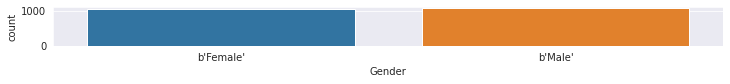

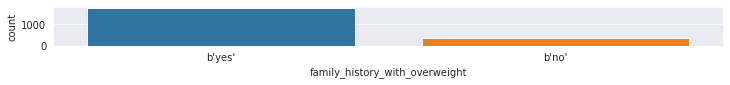

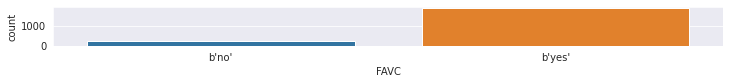

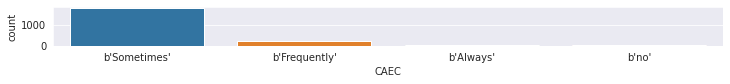

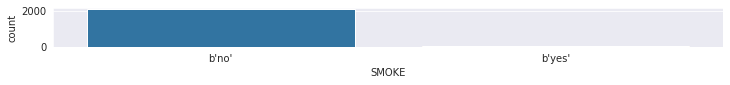

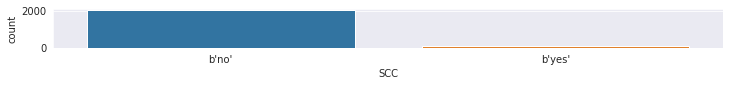

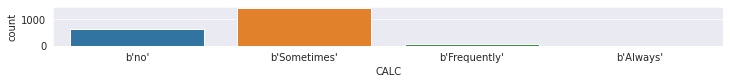

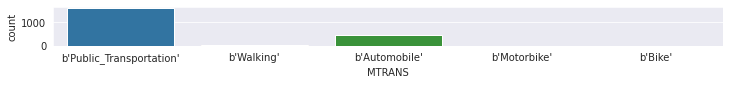

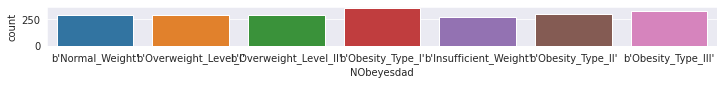

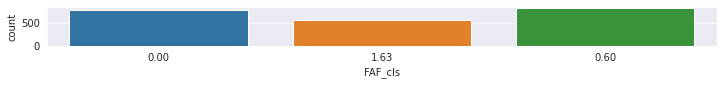

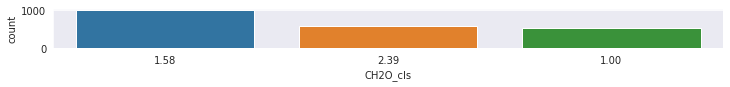

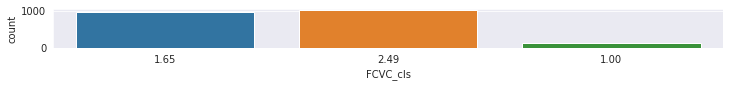

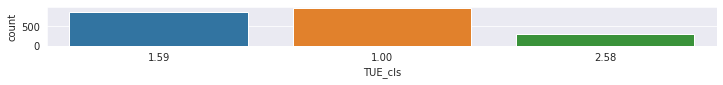

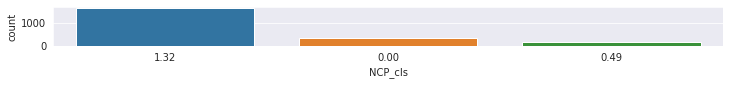

In [92]:

cat_len = len(categoricals)
ind = 0

for cat in categoricals:
  fig = plt.figure(figsize=(12, 12))
  ind += 1
  ax = fig.add_subplot(cat_len, 1,  ind)
  sns.countplot(x = cat, data = df, ax = ax)
  
plt.show()
  

##<b>Bivariate Analysis</b> 

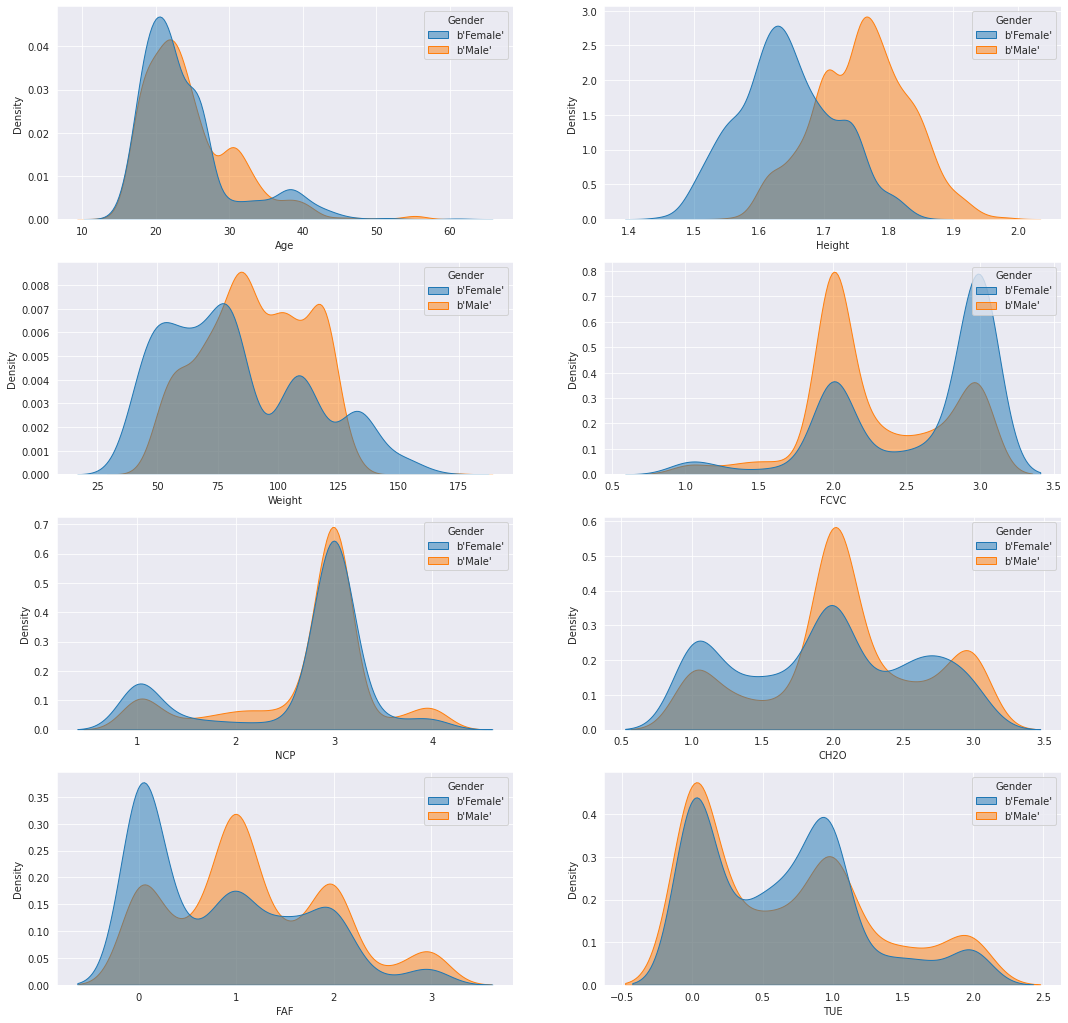

In [ ]:
cats = [cat for cat in categoricals if not cat.endswith('_cls') and not cat.endswith('dad')]
INDEX = 0
ind = 1
fig = plt.figure(figsize=(18, 18))
for number in numericals:
  ax = fig.add_subplot(4, 2, ind)
  sns.kdeplot(x = number, fill=True, alpha = 0.5, data = df, hue  = cats[INDEX], ax = ax)
  ind +=1 

plt.show()


<h3> INFERENCE  </h3> 
<ul> 
  <li>Females eat high caloric foods more frequently than males</li>
  <li>If the subject is female she is more likely to peform no physical activity than males</li>
  <li>Females also happen to have lower heights and weights</li>
</ul> 


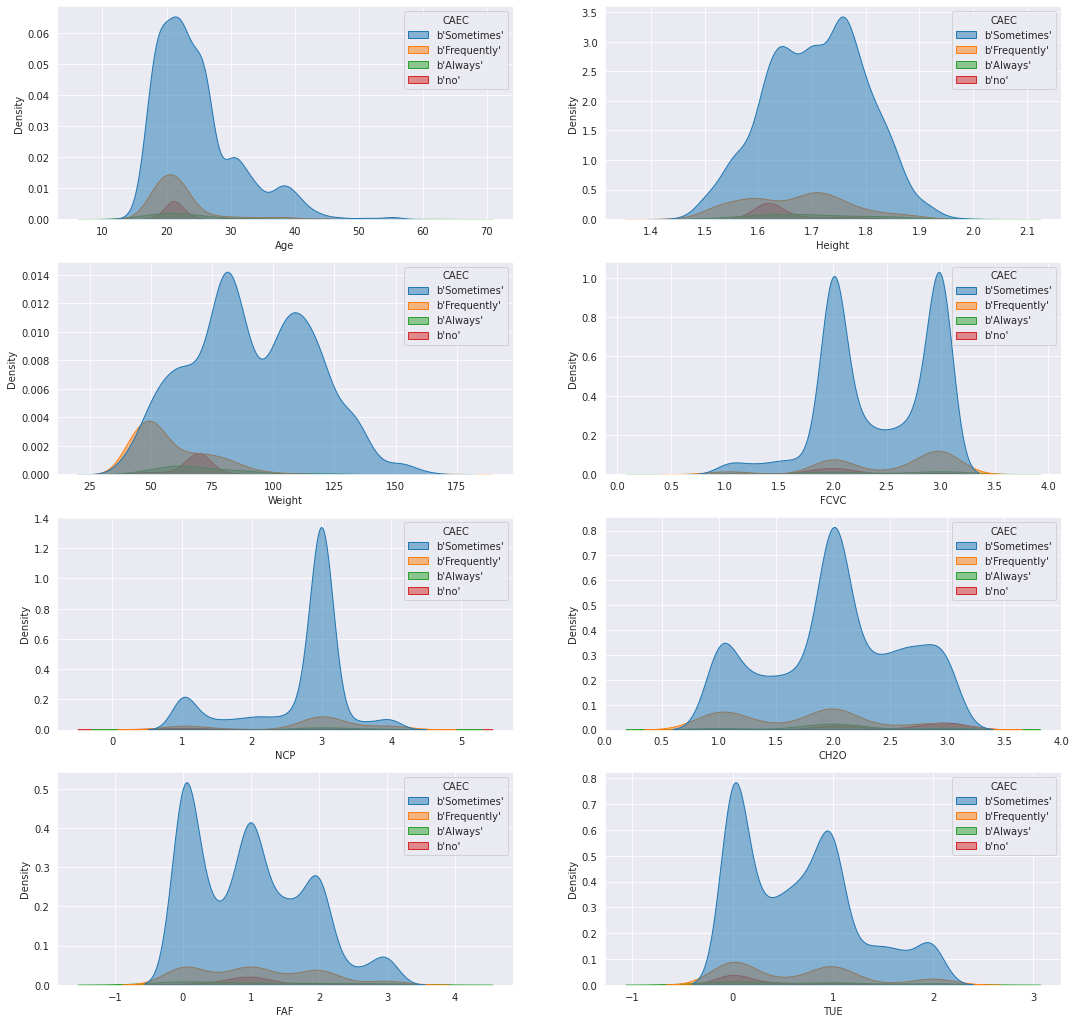

In [ ]:

INDEX = 3
ind = 1
fig = plt.figure(figsize=(18, 18))
for number in numericals:
  ax = fig.add_subplot(4, 2, ind)
  sns.kdeplot(x = number, fill=True, alpha = 0.5, data = df, hue  = cats[INDEX], ax = ax)
  ind +=1 

plt.show()


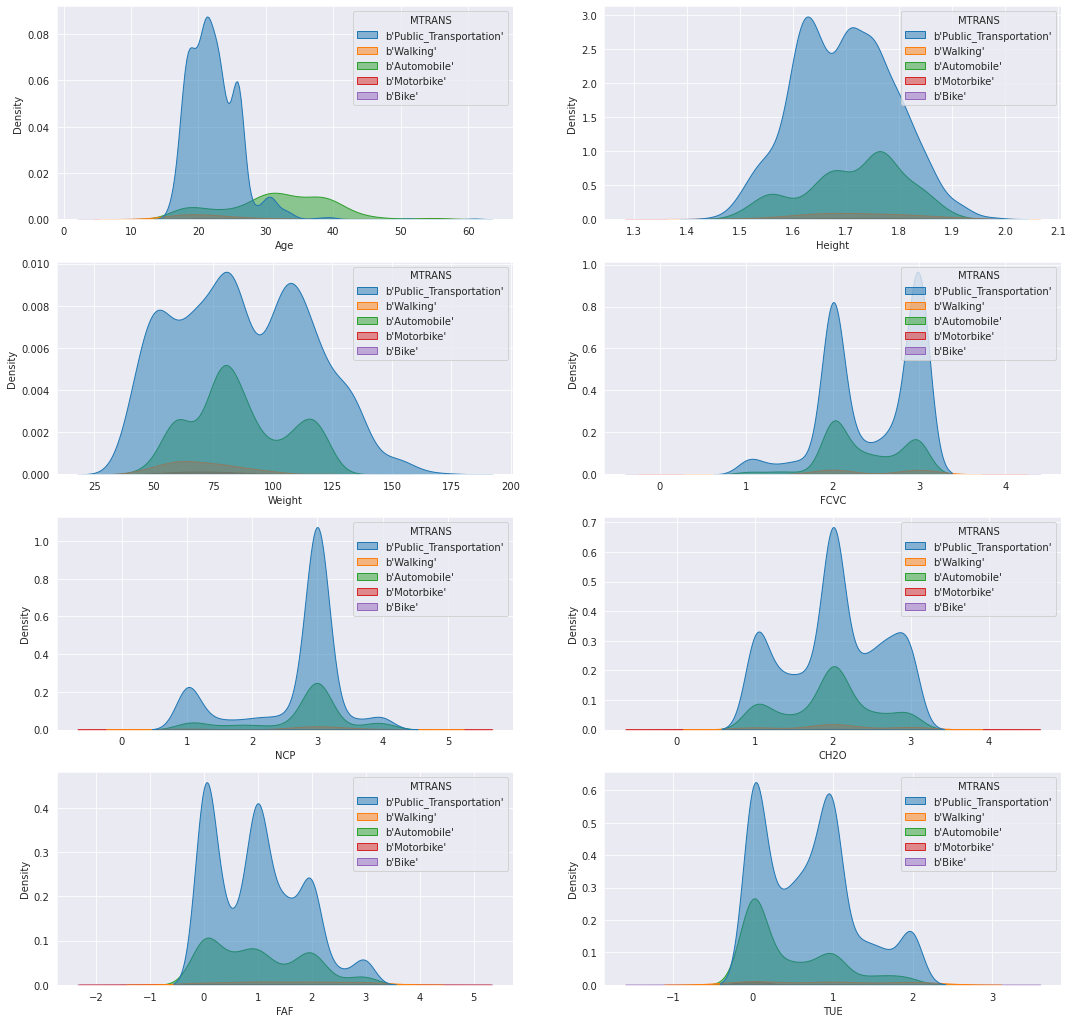

In [ ]:

INDEX = 7
ind = 1
fig = plt.figure(figsize=(18, 18))
for number in numericals:
  ax = fig.add_subplot(4, 2, ind)
  sns.kdeplot(x = number, fill=True, alpha = 0.5, data = df, hue  = cats[INDEX], ax = ax)
  ind +=1 

plt.show()


##INFERENCE 
<ul> 
<li>People who drive automobiles are older than the people who travel using public transportation </li>
</ul> 


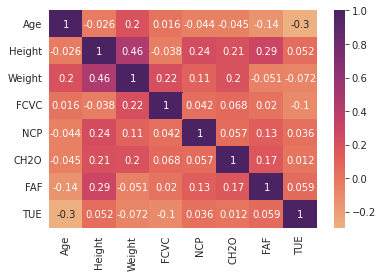

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='flare') 
plt.show()

We could infer the correlationship between Height and weight but there seems to be correlations between a lot of other variables as well. 

* FAF vs Height
* TUE vs Age
* CH2O vs Height 
* NCP vs Height 


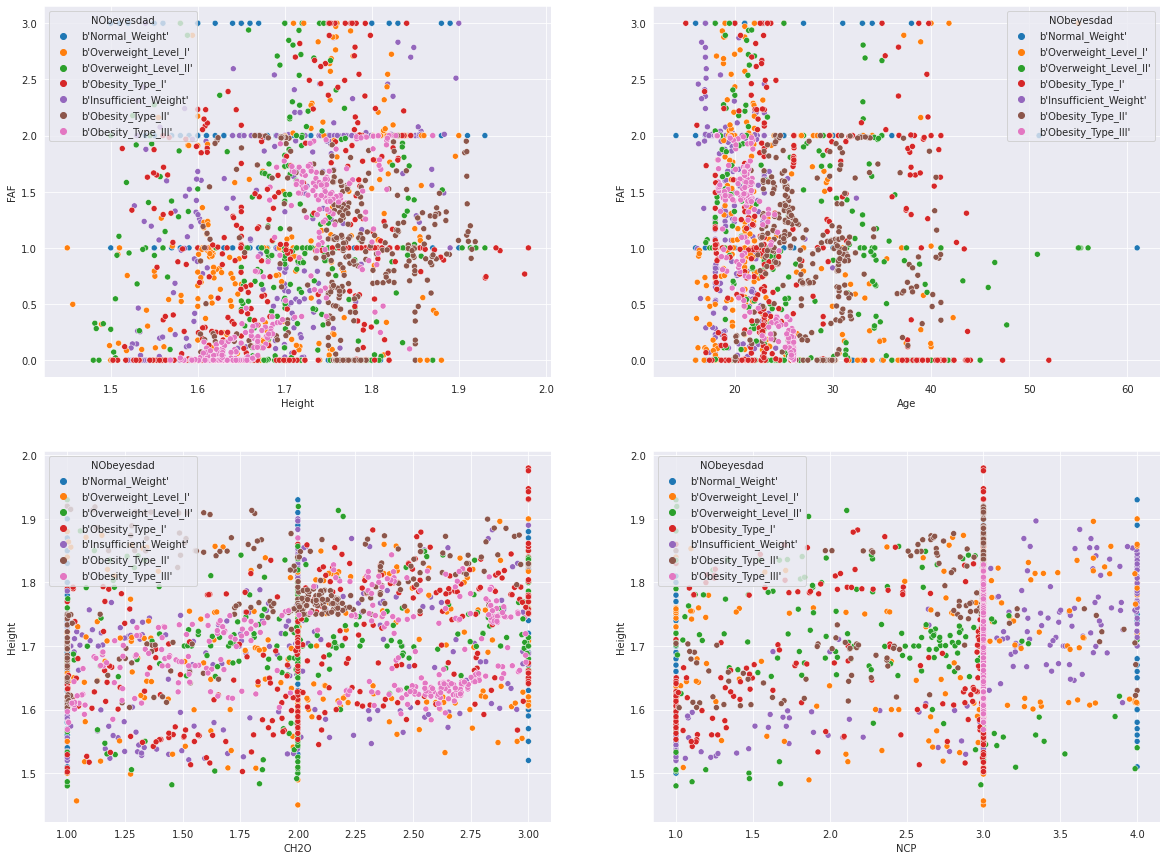

In [ ]:
fig = plt.figure(figsize = (20, 15))

plots = {
    'Height':'FAF', 
    'Age':'FAF',
    'CH2O':'Height', 
    'NCP':'Height'
}

ind = 0
for x, y in plots.items():
  ax = fig.add_subplot(2, 2, ind+1)
  sns.scatterplot(x = x, y = y, data= df, hue = 'NObeyesdad', ax = ax)
  ind += 1

plt.show()



Ooof.. That does not look pleasant. Let's segnment these and see if we can extract any patterns 


<Figure size 864x1800 with 0 Axes>

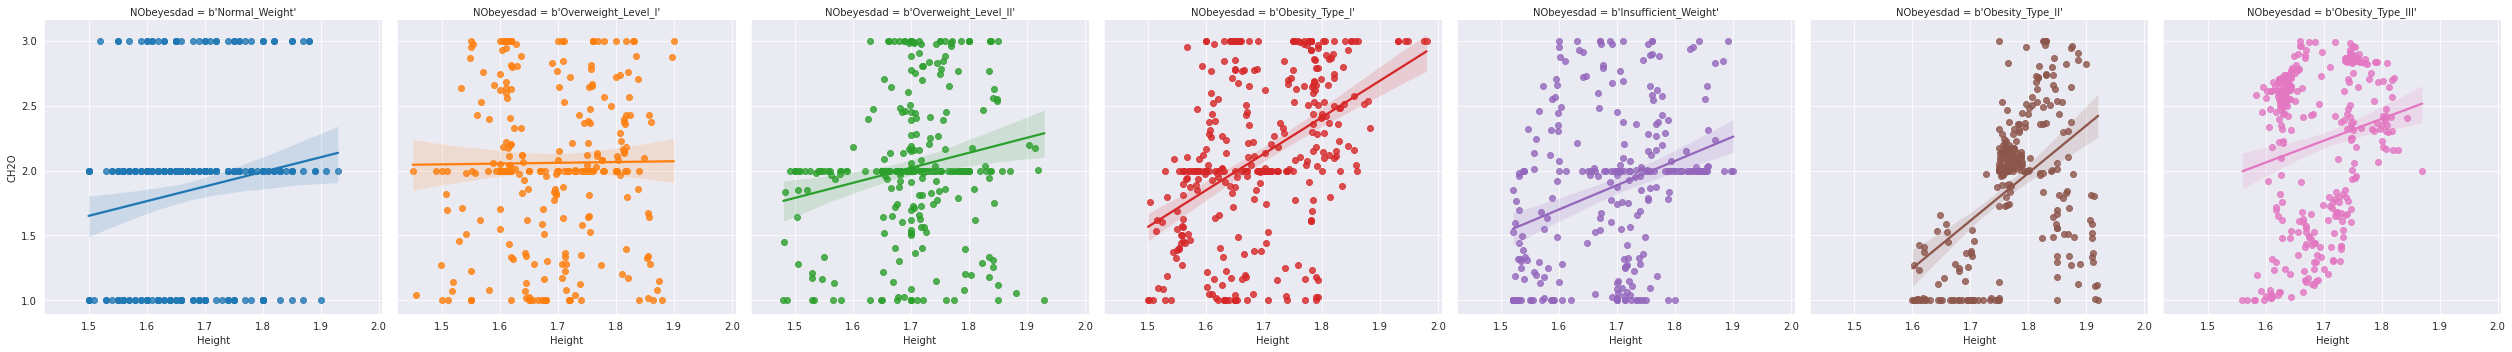

In [ ]:
plt.figure(figsize=(12, 25))
sns.lmplot(x = 'Height', y = 'CH2O', data = df, col='NObeyesdad', hue = 'NObeyesdad')
plt.show()

* Water consumption and height show an approximately linear trend in type 2 obesity 
* Normal weights have discrete values of water consumption frequencies

<Figure size 864x1800 with 0 Axes>

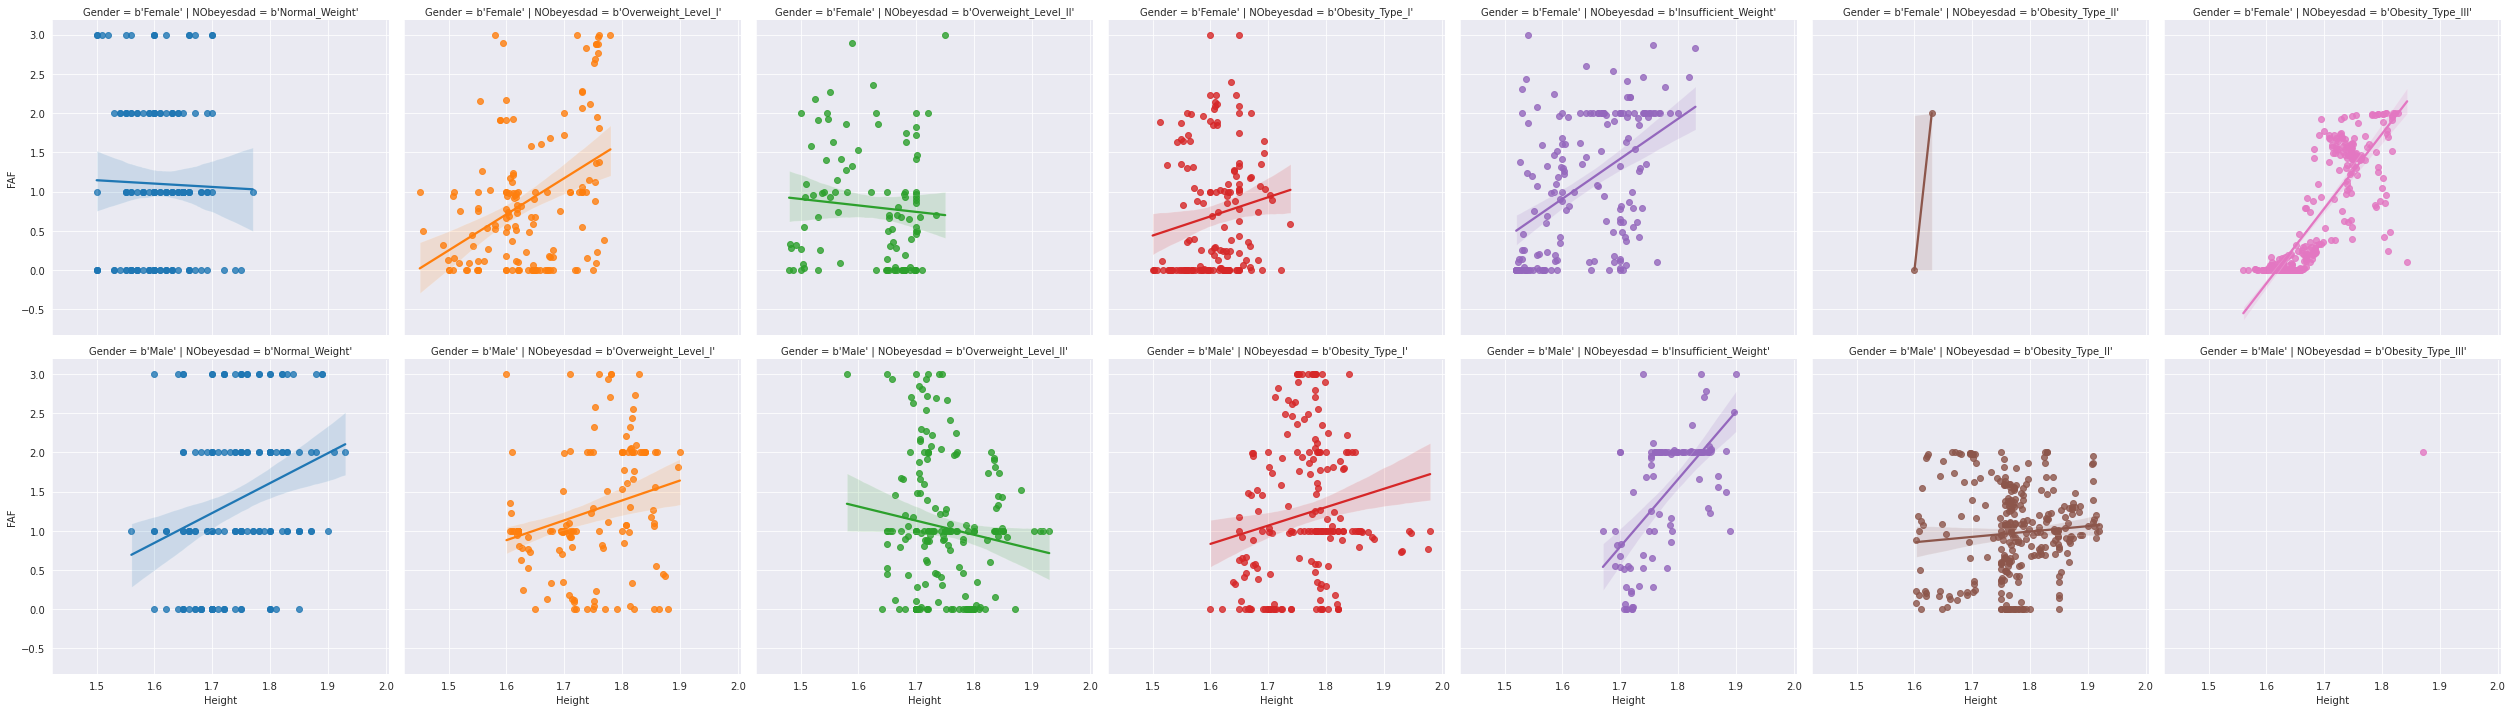

In [ ]:
plt.figure(figsize=(12, 25))
sns.lmplot(x = 'Height', y = 'FAF', data = df, col='NObeyesdad', hue = 'NObeyesdad', row = 'Gender')
plt.show()

* We observe some kind of trend of height with physical exercise in the obesity type 3 classified patients 
* We see a similiar pattern for Normal weight class in the distribution of FAF 
* Women are more succeptible victims of Type 3 obesity 
* Men are more succeptible victims of Type 2 obesity

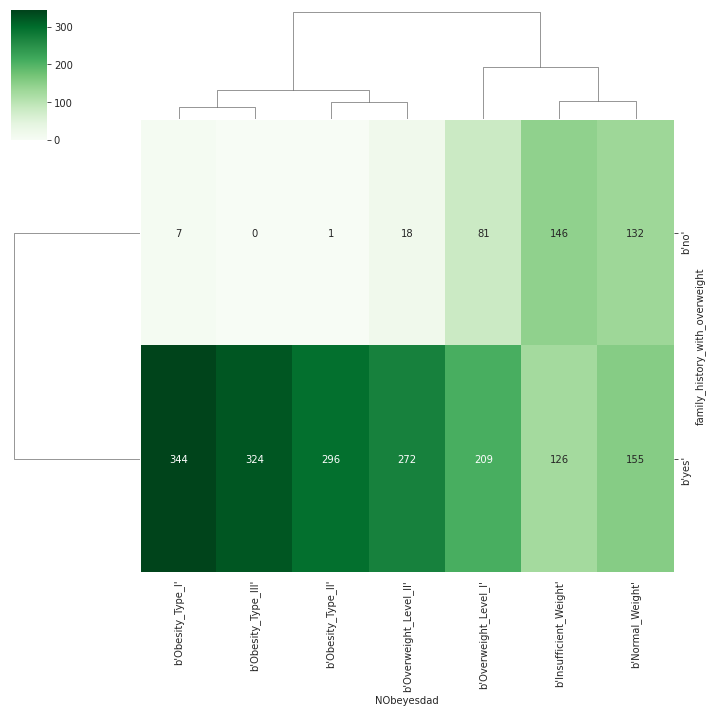

In [ ]:
sns.clustermap(pd.crosstab(df['family_history_with_overweight'], df['NObeyesdad']), annot=True, fmt='d', cmap='Greens') 
plt.show()

##INFERENCE
<ul>
  <li>People with family history are more likely to have any form of obesity</li>
</ul>


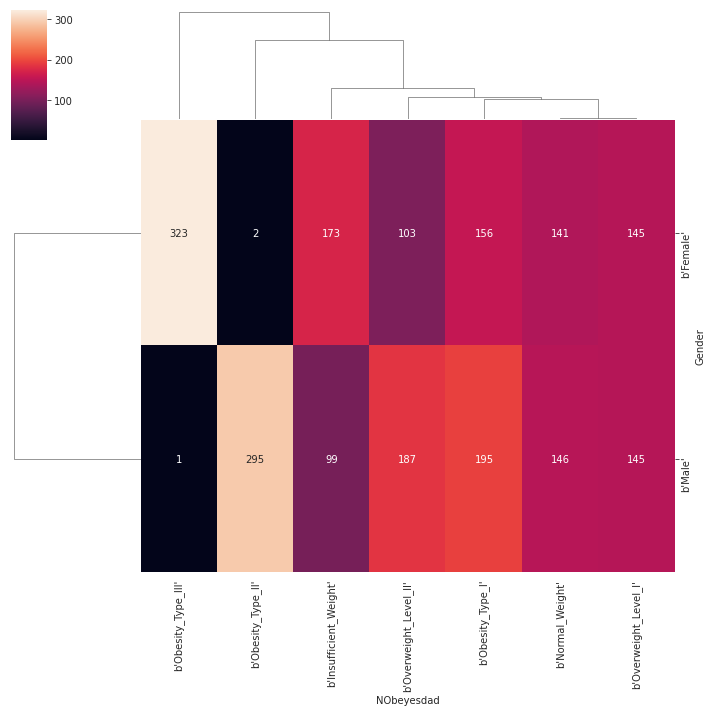

In [ ]:
sns.clustermap(pd.crosstab(df['Gender'], df['NObeyesdad']), annot=True, fmt='d') 
plt.show()

##INFERENCE 
<ul>
<li>Women are more likely to have type 3 obesity</li>
<li>Men are more likely to have type 2 obesity</li>
</ul>


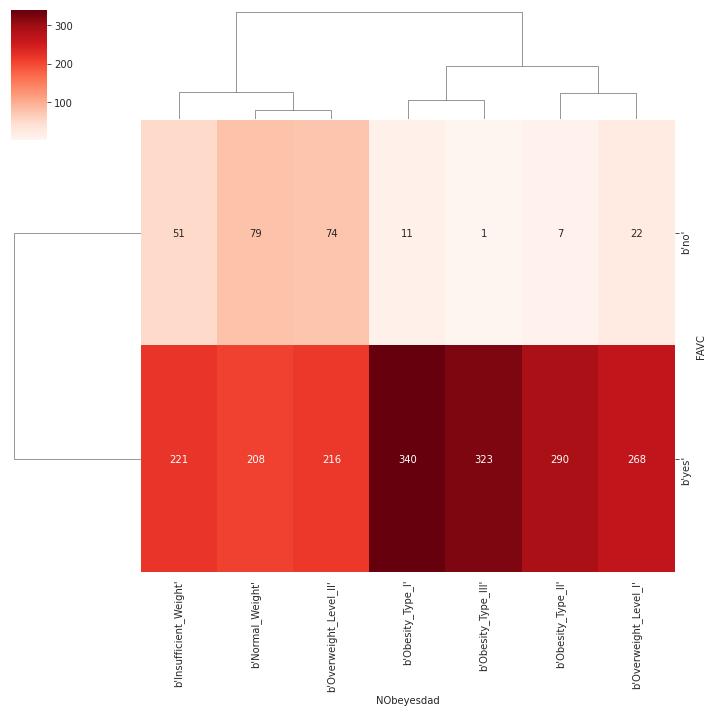

In [ ]:
sns.clustermap(pd.crosstab(df['FAVC'], df['NObeyesdad']), annot=True, fmt='d', cmap='Reds') 
plt.show()

INFERENCE
<ul>
  <li>Consumption of high caloric foods cause Type 1 and Type 3 obesity
  </li>
</ul>

<Figure size 360x360 with 0 Axes>

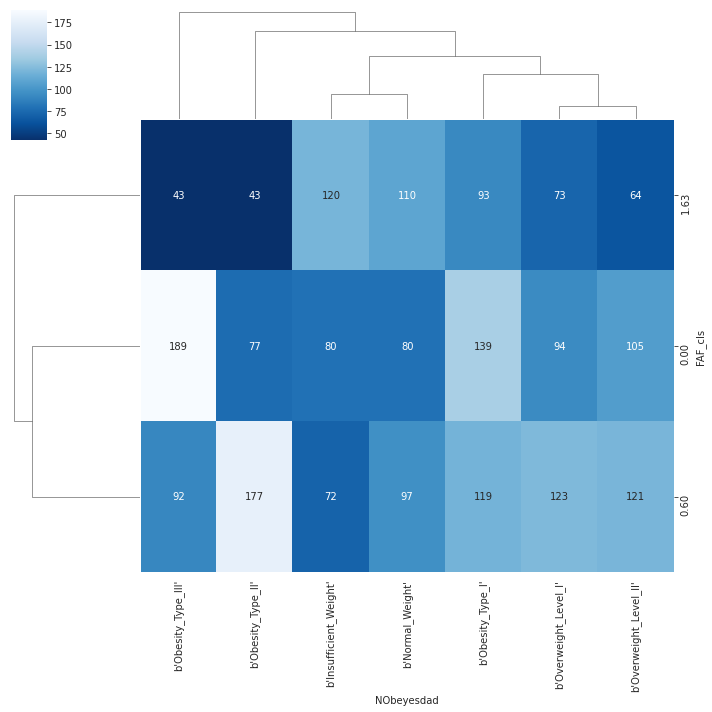

<Figure size 360x360 with 0 Axes>

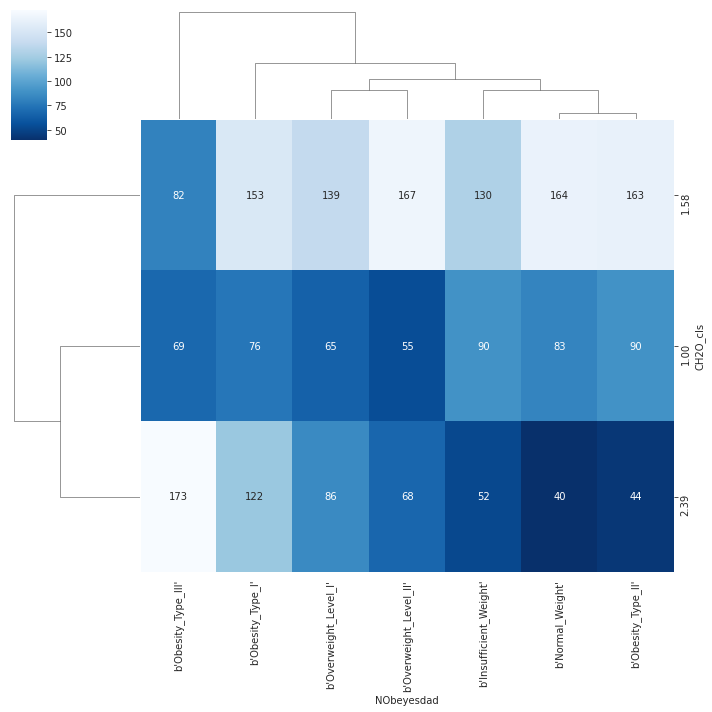

<Figure size 360x360 with 0 Axes>

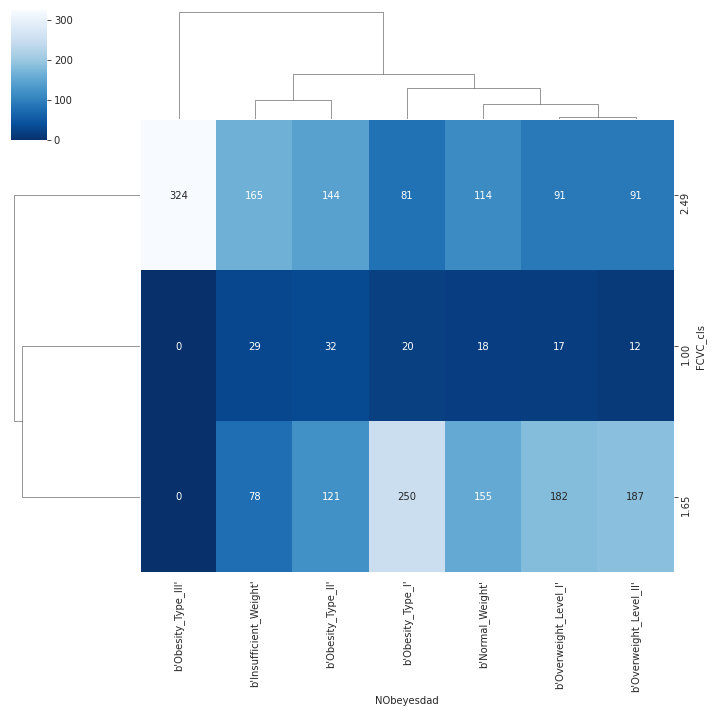

<Figure size 360x360 with 0 Axes>

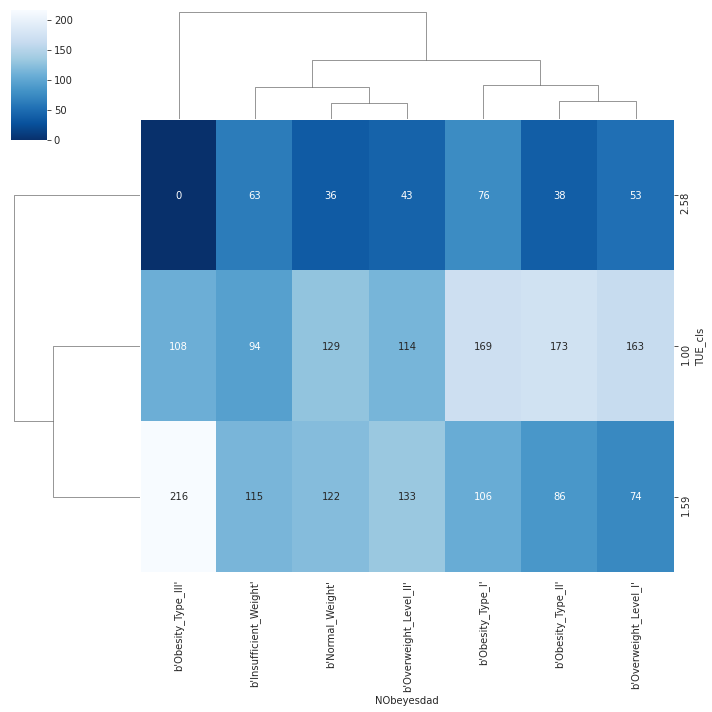

<Figure size 360x360 with 0 Axes>

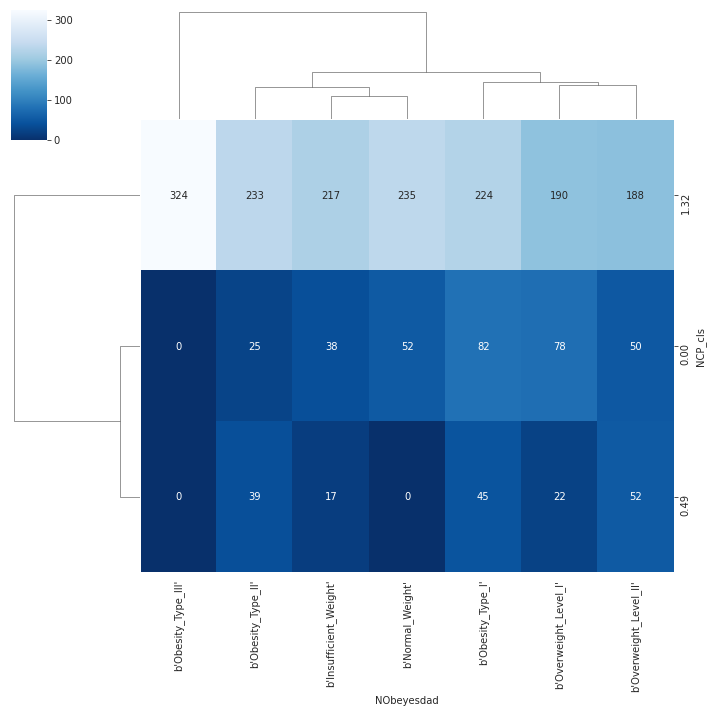

In [ ]:
for col in col_cls: 
  plt.figure(figsize=(5, 5))
  sns.clustermap(pd.crosstab(df[col], df['NObeyesdad']), annot=True, fmt='d', cmap='Blues_r')
  plt.show()

##INFERENCE 
<ul>
  <li>Excessive consumption of water causes type 1 and type 3 obesity</li>
  <li>Higher the physical activity lesser the chances of being over weight</li>

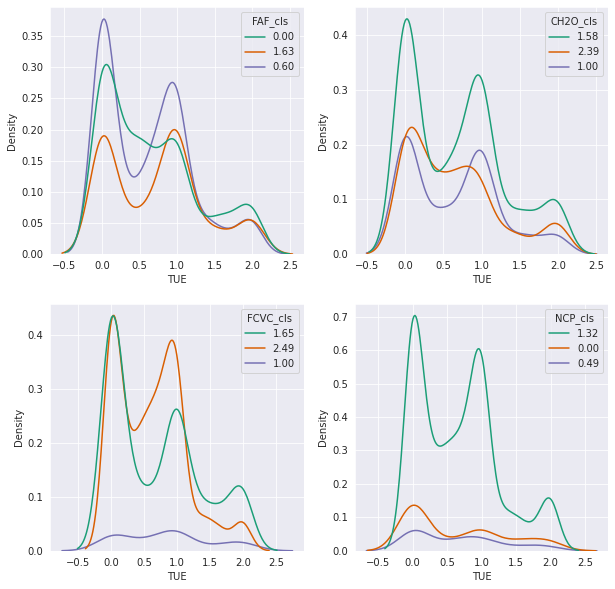

In [ ]:
column = col_cls[3]
ind = 1
fig = plt.figure(figsize=(10, 10))
for col in col_cls: 
  
  if col == column: continue
  numerical_col = column.split('_')[0]
  ax = fig.add_subplot(2, 2, ind)
  sns.kdeplot(x = numerical_col, hue = col, data = df, ax=ax, alpha=1, palette='Dark2')
  ind += 1

plt.show()
  

#### **Nuh-uh not distinct enough to derive any conclusions.**
**So far we've noted down the following.**
* Height and weight together are offer clear distinctions for types of Obesity. 
* Gender is a relevant factor when it comes to type 3 obesity. 
* Water consumption is inversely proportional the type of obesity. 
####Let's make a plot that can help us visualise a what a mathematical model would look like if we are to determine the type of obesity a person has... 

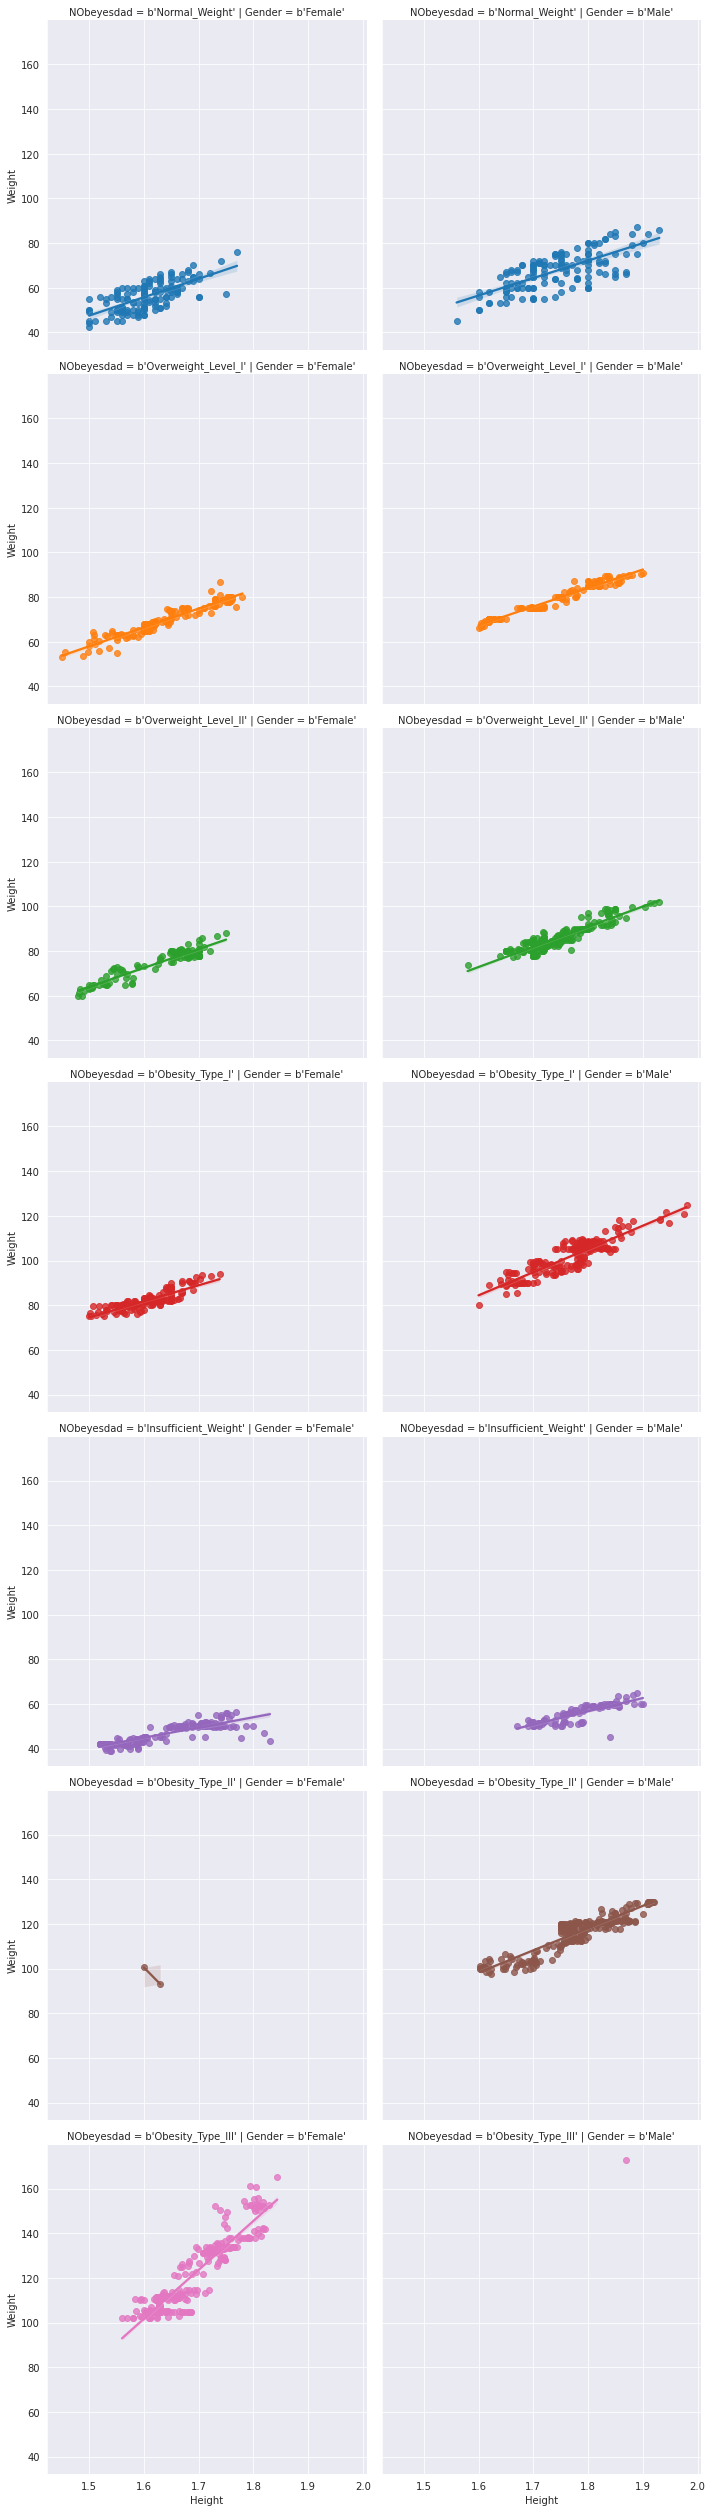

In [ ]:
sns.lmplot( x= 'Height', y = 'Weight', data = df, hue = 'NObeyesdad', row = 'NObeyesdad', col = 'Gender')

* POSTULATE 1: If the victim is a male do NOT classify as Type 3 Obesity. 
* POSTULATE 2: If the victim is a female do NOT classifiy as Type 2 Obesity. 
* POSTULATE 3: Based on Height weight and gender you can very distinctly tell the classification of the person into type of obesity the person has.
##QUESTION:
Why is gender an important feature in classification ? What makes the males different from the females to not be victims of Type 3 Obesity and the same can be asked for females with Obesity Type 2

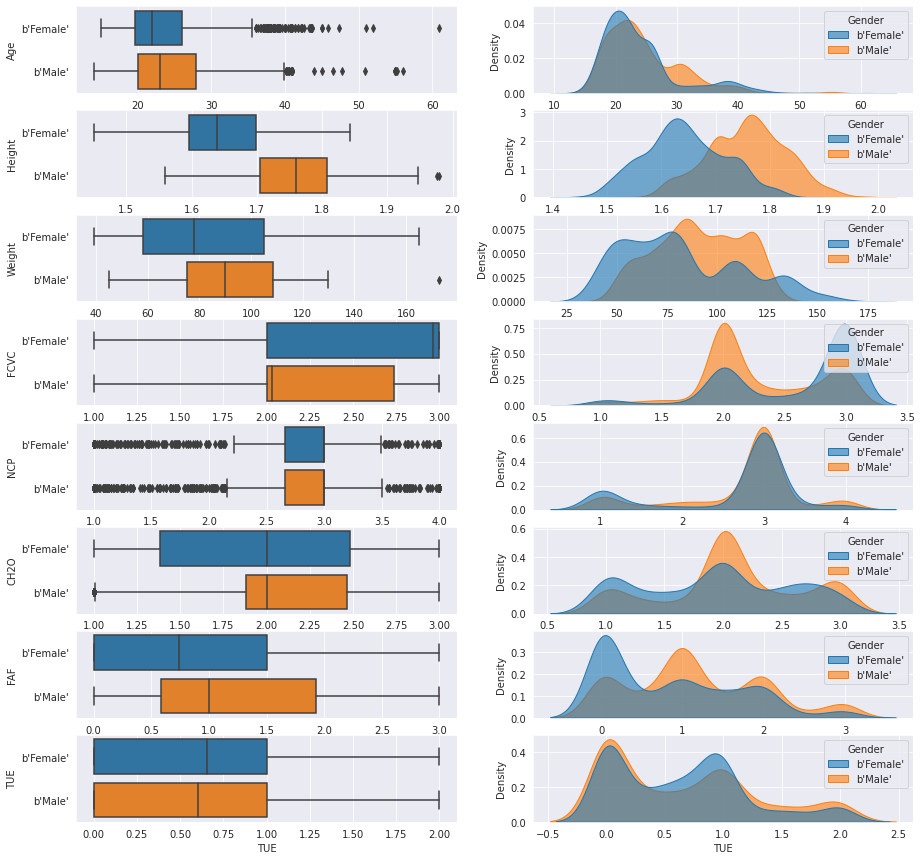

In [ ]:
numericals = df.select_dtypes(np.number).columns 
fig = plt.figure(figsize=(15, 15))
ind = 1
for col in numericals: 
  ax1 = fig.add_subplot(8, 2, ind)
  ax2 = fig.add_subplot(8, 2, ind+1)

  sns.boxplot(x = col, y = 'Gender', data = df, ax = ax1) 
  sns.kdeplot( x = col, hue = 'Gender', data = df, ax = ax2, fill=True, alpha = 0.6)
  ax1.set_ylabel(col)
  ind += 2

plt.show()




#####No distintive practises that distinguishes the females from the males in the numerical columns. 
#####Let's see if we see any differences in the categorical columns 

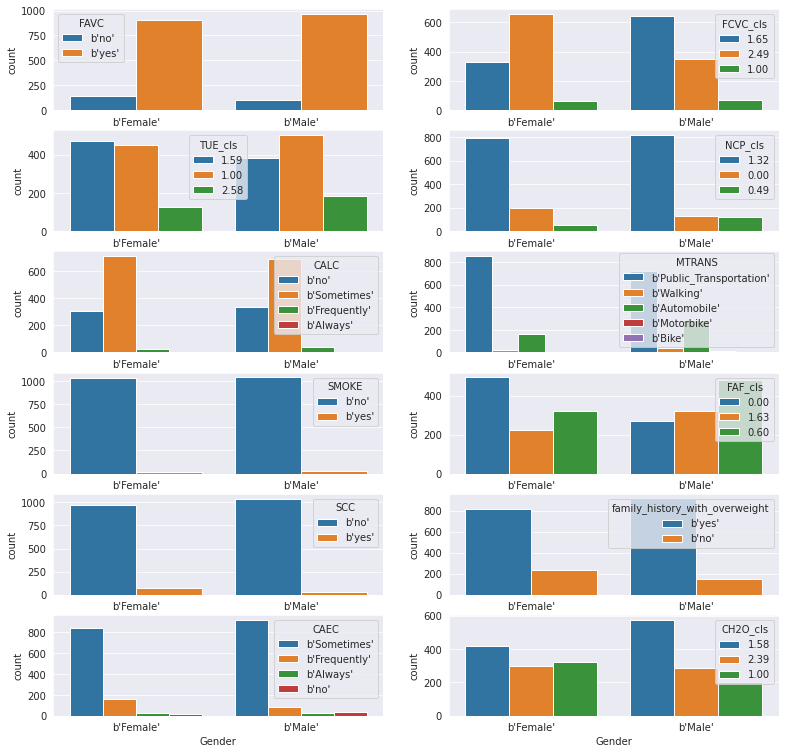

In [ ]:
cats = list(set(df.select_dtypes(object).columns) - set(['Gender', 'NObeyesdad'])) 
count = np.ceil(len(cats)/2) 

fig = plt.figure(figsize=(13, 13))

ind = 1
for cat in cats:
  ax = fig.add_subplot(count, 2, ind)
  sns.countplot(x = 'Gender', data = df, hue = cat, ax = ax)
  ind += 1

plt.show()


We've identified three categories that create a difference in males and females for classification of obesity. 

* CH20_cls: Clusters formed for consumption of water 
* FAF_cls: Clusters formed for the amount of Physical activity peformed
* FCVC_cls: Clusters formed from the amount vegetable consumption 


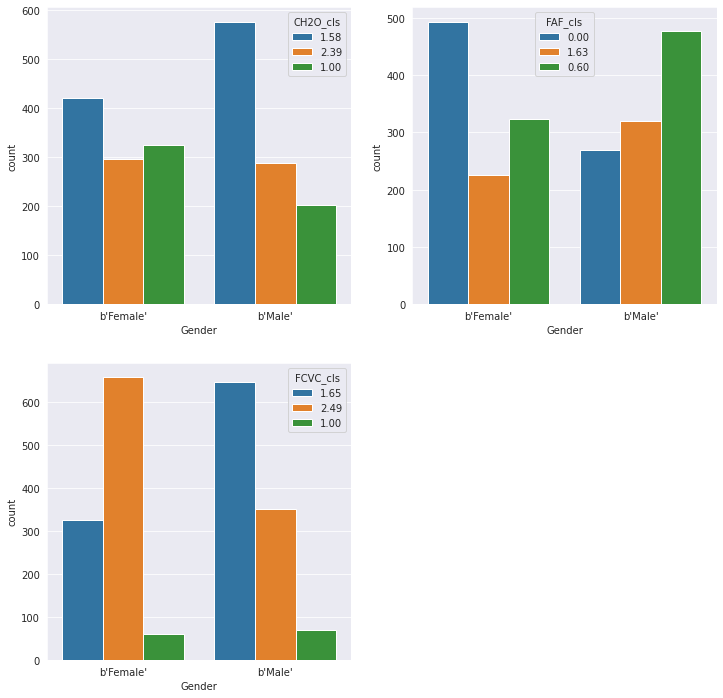

In [ ]:
fig = plt.figure(figsize=(12, 12))
ind = 0
for cat in ['CH2O_cls', 'FAF_cls', 'FCVC_cls']:
  ax = fig.add_subplot(2, 2, ind+1)
  sns.countplot(x = 'Gender', hue = cat, data = df, ax = ax)
  ind += 1

plt.show()
  

* Males do more physical activity than females on average. 
* Females consume more vegetables than males. 
* Males consume more water than females. 